In [1]:
import numpy as np
import pandas as pd
import pickle
from scipy import integrate, signal
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from toy_models import *
%matplotlib widget

# Quantify bif point

In [2]:
bifurcation = []

for i in range(15,50,5):
    with open(f'k500_t{i}_simpl.pkl', 'rb') as f:
        params_ksmall, res_ksmall = pickle.load(f)
        
    x_limit = i # check if reasonable
    y_threshold_initial = 1.0
    y_threshold = 10.0

    upper_target_trajectories = []
    lower_target_trajectories = []

    for r in res_ksmall:
        # Check if the trajectory goes straight at the beginning
        if np.all(np.abs(r.y[1][r.y[0] < x_limit]) < y_threshold_initial):
            # If it does, check if the trajectory reaches the upper target
            if r.y[1][-1] > y_threshold:
                upper_target_trajectories.append(r)
            # Check if the trajectory reaches the lower target
            elif r.y[1][-1] < -y_threshold:
                lower_target_trajectories.append(r)

    # print(f'Number of upper target trajectories: {len(upper_target_trajectories)}')
    # print(f'Number of lower target trajectories: {len(lower_target_trajectories)}')

    # Lists to store the y values for each group
    y_values_upper = []
    y_values_lower = []

    # Collect y values for the upper group
    for r in upper_target_trajectories:
        y_values_upper.append(r.y[1][:7500])

    # Calculate average y values for the upper group
    avg_y_upper = np.mean(y_values_upper, axis=0)

    # Collect y values for the lower group
    for r in lower_target_trajectories:
        y_values_lower.append(r.y[1][:7500])

    # Calculate average y values for the lower group
    avg_y_lower = np.mean(y_values_lower, axis=0)

    # Find the t value where the two averages intersect
    t_intersection = np.where(np.isclose(avg_y_upper, avg_y_lower, atol=0.1))[0]
    #select value greater than 1000
    t_intersection = t_intersection[t_intersection > 1000]

    print(f'Intersection at t = {t_intersection}')

    x_up_intersections = []
    x_low_intersections = []

    for r1 in upper_target_trajectories:
        for t in t_intersection:
            x_up_intersections.append(r1.y[0][t])
    
    for r2 in lower_target_trajectories:
        for t in t_intersection:
            x_low_intersections.append(r2.y[0][t])

    # concatenate x_up_intersections and x_low_intersections
    x_inters = np.concatenate((x_up_intersections, x_low_intersections))

    x_min = np.min(x_inters)
    x_max = np.max(x_inters)
    # print(f'x_inters: {x_inters}')
    # Calculate the average and std of the x values at the intersection
    x_intersection = np.mean(x_inters)
    x_intersection_std = np.std(x_inters)

    bifurcation.append([i, x_intersection, x_min, x_max, x_intersection_std])


Intersection at t = [2180 2181 2182 2183 2184 2185 2186 2187 2188 2189 2190 2191 2192 2193
 2194 2195 2196 2197 2198 2199 2200 2201 2202 2203 2204 2205 2206 2207
 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220 2221
 2222 2223 2224 2225 2226 2227 2228 2229 2230 2231 2232 2233 2234 2235
 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248 2249
 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262 2263
 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 2276 2277
 2278 2279]
Intersection at t = [3248 3249 3250 3251 3252 3253 3254 3255 3256 3257 3258 3259 3260 3261
 3262 3263 3264 3265 3266 3267 3268 3269 3270 3271 3272 3273 3274 3275
 3276 3277 3278 3279 3280 3281 3282 3283 3284 3285 3286 3287 3288 3289
 3290 3291 3292 3293 3294 3295 3296 3297 3298 3299 3300 3301 3302 3303
 3304 3305 3306 3307 3308 3309 3310 3311 3312 3313 3314 3315 3316 3317
 3318 3319 3320 3321 3322 3323 3324 3325 3326 3327 3328 3329]
Intersection at t = [3884 3885 388

In [3]:
bifurcation

[[15,
  28.39790203955,
  27.74369987329529,
  29.051558011767685,
  0.368182196843461],
 [20,
  41.92352933224256,
  41.38502469177271,
  42.481133486130275,
  0.3018209951914043],
 [25,
  50.02763825219128,
  49.50052227509502,
  50.56306970139534,
  0.2942172789843651],
 [30,
  55.77584407784871,
  55.33882201508022,
  56.23476767293946,
  0.2423506050015994],
 [35,
  59.750763925522,
  59.27034059358705,
  60.225696449763014,
  0.2682473273187212],
 [40,
  62.863248795598494,
  62.31692408866379,
  63.42597037122739,
  0.30194331636830535],
 [45,
  65.47593939962834,
  64.92111872834826,
  66.03715250354138,
  0.2985289204034259]]

In [4]:
# bifurcation
tar_x = params_ksmall[3]
tar_y = params_ksmall[4]

# convert bifurcatin x to angle
bifurcation_angle = []
for i in range(len(bifurcation)):
    bifurcation_angle.append([bifurcation[i][0],
                              np.degrees(np.arctan(tar_y/(tar_x-bifurcation[i][1]))),
                              abs(np.degrees(np.arctan(tar_y/(tar_x-bifurcation[i][1]))) - np.degrees(np.arctan(tar_y/(tar_x-bifurcation[i][2])))),
                              abs(np.degrees(np.arctan(tar_y/(tar_x-bifurcation[i][1]))) - np.degrees(np.arctan(tar_y/(tar_x-bifurcation[i][3])))),
                              np.degrees(bifurcation[i][4]/(tar_x))])

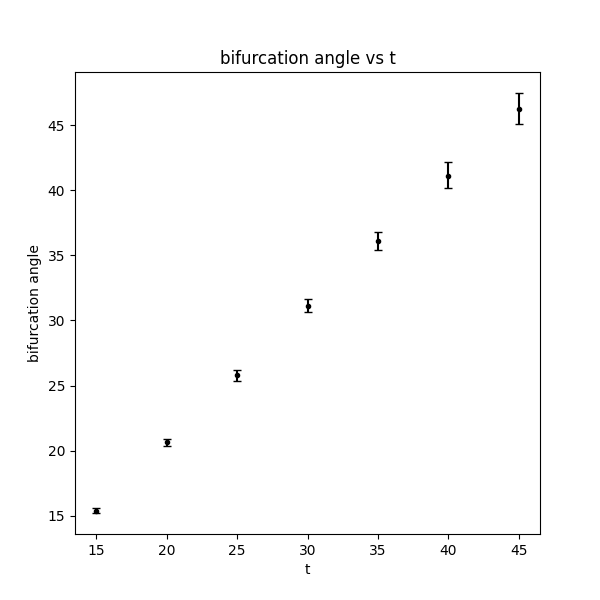

In [5]:
# plot bifurcation angle
fig, ax = plt.subplots(figsize=(6,6))
ax.errorbar([i[0] for i in bifurcation_angle], [i[1] for i in bifurcation_angle], yerr=[[i[2] for i in bifurcation_angle],[i[3] for i in bifurcation_angle]], fmt='.', capsize=3, color='black')
# (ang_thresh, np.degrees(ang_crit), yerr=np.degrees(std), fmt='o', capsize=3, color='black')
plt.xlabel('t')
plt.ylabel('bifurcation angle')
plt.title('bifurcation angle vs t')
plt.show()
